In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.term_generation import gen_filtered_lambda_terms
from calculus_path_mod.json_serialization import load_terms
from calculus_utils.drawing import draw_hist

Lambda = Abstraction
App = Application

In [2]:
terms = load_terms("terms_210_filtered_LO.dat")

In [3]:
n_strategy = LOStrategy()
steps_LO = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="LO:")]

n_strategy = RandomOuterStrategy(prob_norm="softmax")
steps_RandOut_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandOut soft:")]

n_strategy = RandomOuterStrategy(prob_norm="sum")
steps_RandOut_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandOut sum:")]

n_strategy = RandomOuterStrategy(prob_norm="pow_2")
steps_RandOut_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandOut pow_2:")]

n_strategy = RandomInnerStrategy(prob_norm="softmax")
steps_RandIn_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandIn soft:")]

n_strategy = RandomInnerStrategy(prob_norm="sum")
steps_RandIn_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandIn sum:")]

n_strategy = RandomInnerStrategy(prob_norm="pow_2")
steps_RandInt_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandIn pow_2:")]

RandIn pow_2:: 100%|██████████| 226/226 [00:12<00:00, 18.63it/s] 


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.40it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.009467  1654.055774 -2261.930038     inf      0.098277   
exponpow         0.023325  1163.902294 -2058.138958     inf      0.342505   
chi2             0.026582  2288.994545 -2028.598547     inf      0.485483   
rayleigh         0.031051  3741.822367 -1998.903409     inf      0.285244   
powerlaw         0.031810  1190.233526 -1988.021164     inf      0.397891   

             ks_pvalue  
lognorm   2.367790e-02  
exponpow  3.574513e-24  
chi2      1.398098e-49  
rayleigh  9.096998e-17  
powerlaw  8.676906e-33  
{'lognorm': {'s': 0.9312641226082068, 'loc': 0.21649866657077885, 'scale': 4.956829891956447}}
Norm distribution: (8.119469026548673, 12.098009478686393)


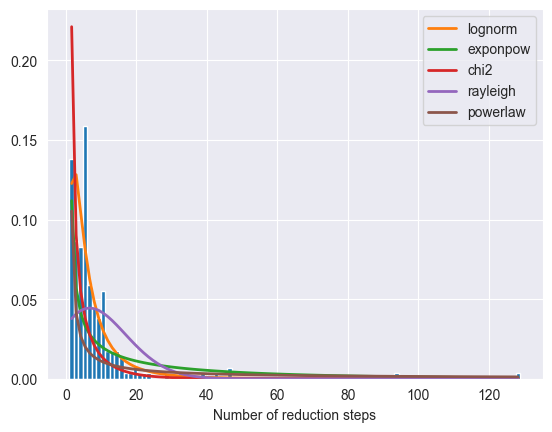

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.81it/s]

Log Norm distribution params: (1.6639868323131533, 0.8756742156462579); expected value = 7.7476494321781155


In [4]:
draw_hist(steps_LO)

In [5]:
steps_dict = dict(Counter(steps_LO))
pd_steps_LO = pd.DataFrame(data={"steps": list(steps_dict.keys()), "count": list(steps_dict.values())})
pd_steps_LO.head()

,steps,count
0,1,21
1,20,2
2,5,24
3,3,25
4,4,24


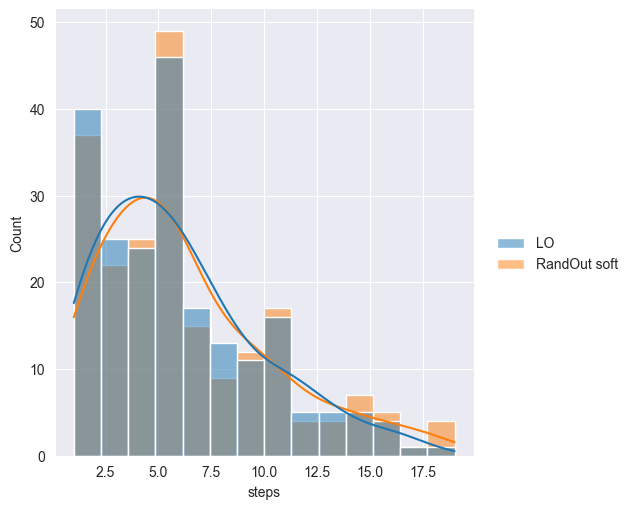

In [6]:
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": [step for step in steps_LO if step < 20],
                        "RandOut soft": [step for step in steps_RandOut_soft if step < 20],
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5)
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

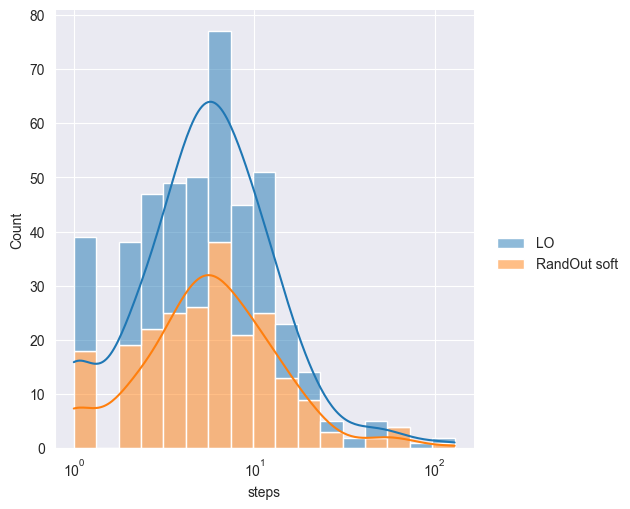

In [7]:
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), multiple="stack")
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

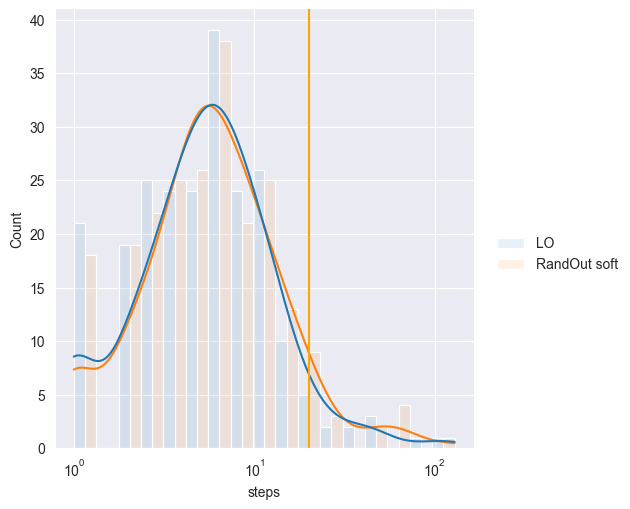

In [8]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.1, log_scale=(True, False), multiple="dodge")
# fig.add_legend(title="LO")
plt.axvline(x=20, color="orange")
fig.set_xlabels("steps")
plt.show()

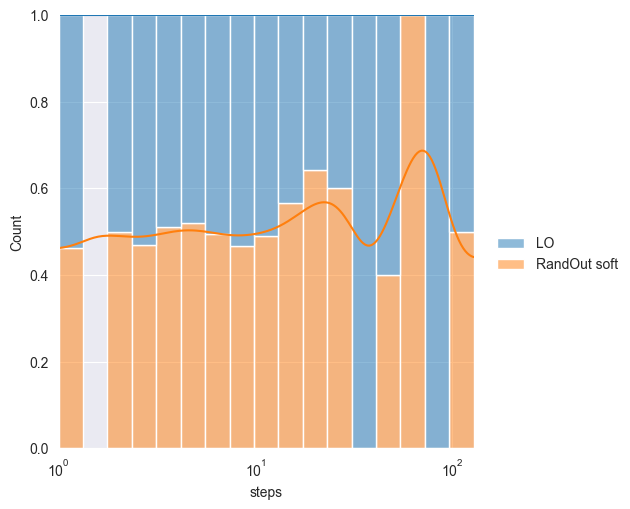

In [9]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), multiple="fill")
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

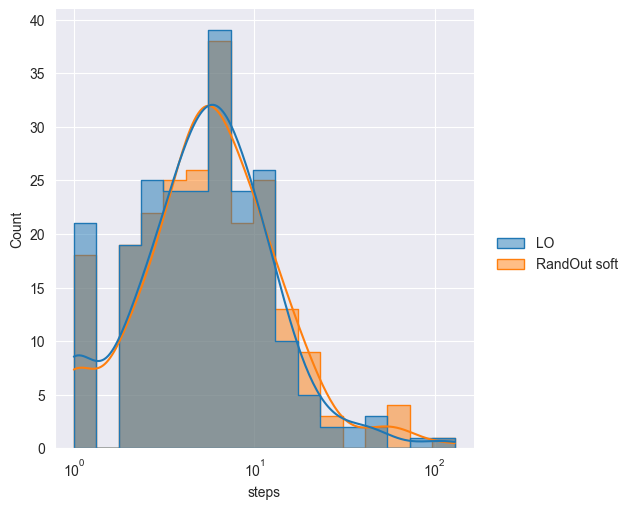

In [10]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), element="step")
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

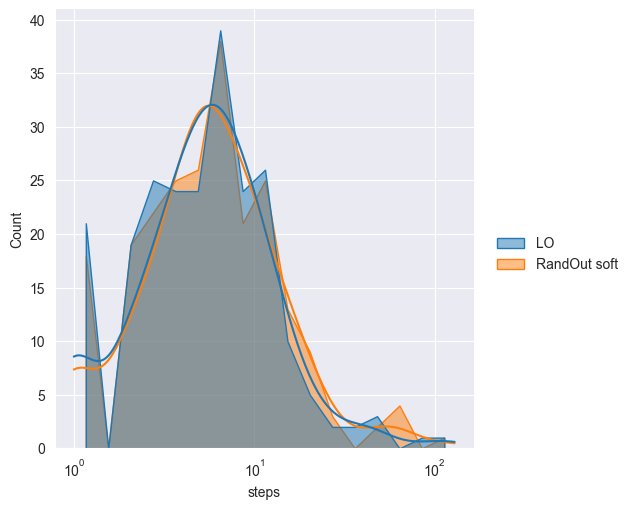

In [11]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), element="poly")
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

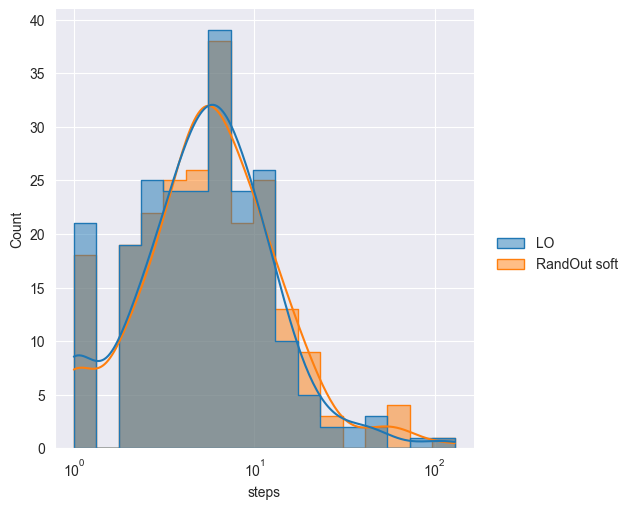

In [12]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), element="step", fill=True)
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

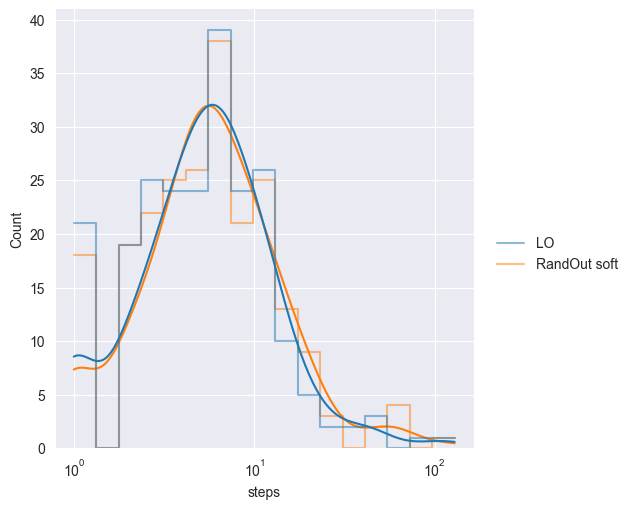

In [13]:
plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.5, log_scale=(True, False), element="step", fill=False)
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

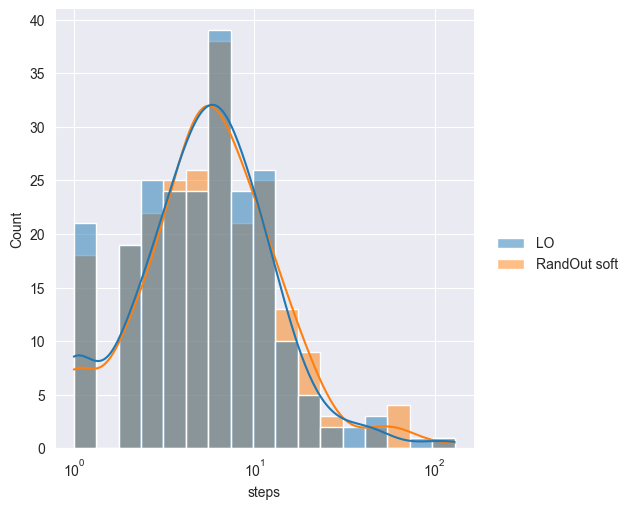

In [14]:
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        }, kde=True, alpha=0.5, log_scale=(True, False))
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_xlabels'

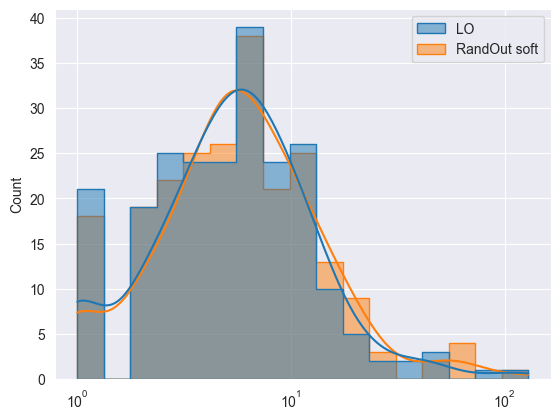

In [15]:
fig = sns.histplot({"LO": steps_LO,
                    "RandOut soft": steps_RandOut_soft,
                    }, kde=True, alpha=0.5, log_scale=(True, False), element="step")
fig.set_xlabels("steps")
plt.show()

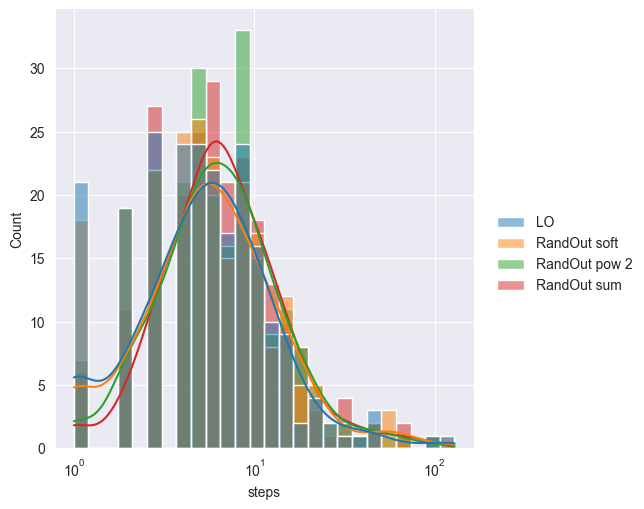

In [16]:
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        "RandOut pow 2": steps_RandOut_pow_2,
                        "RandOut sum": steps_RandOut_sum,
                        }, kde=True, alpha=0.5, log_scale=(True, False))
fig.set_xlabels("steps")
plt.show()

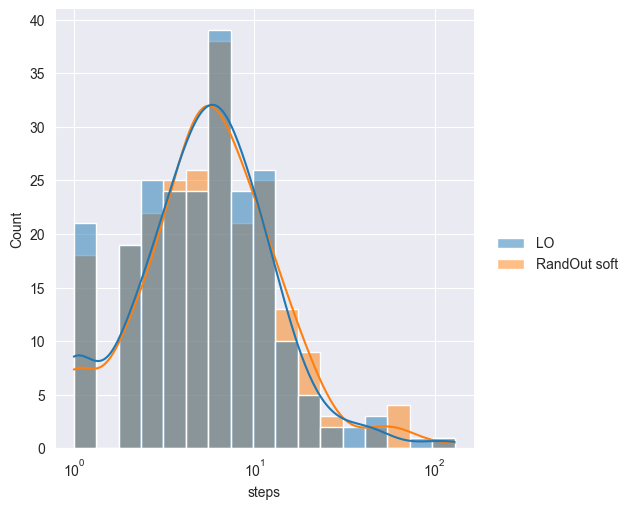

In [17]:
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        },
                  kde=True, alpha=0.5, log_scale=(True, False),
                  )
# fig.add_legend(title="LO")
fig.set_xlabels("steps")
plt.show()

<AxesSubplot: ylabel='Count'>

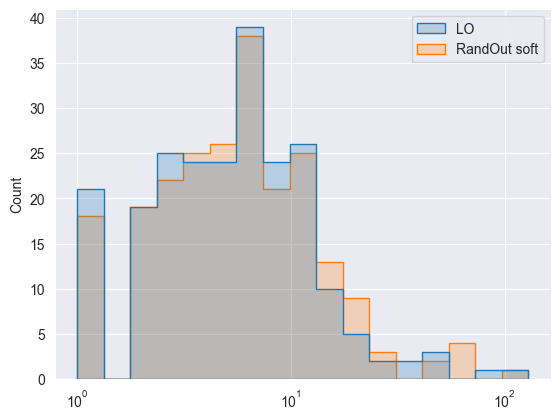

In [18]:
sns.histplot(data={"LO": steps_LO,
                   "RandOut soft": steps_RandOut_soft,
                   }, element="step", log_scale=(True, False))

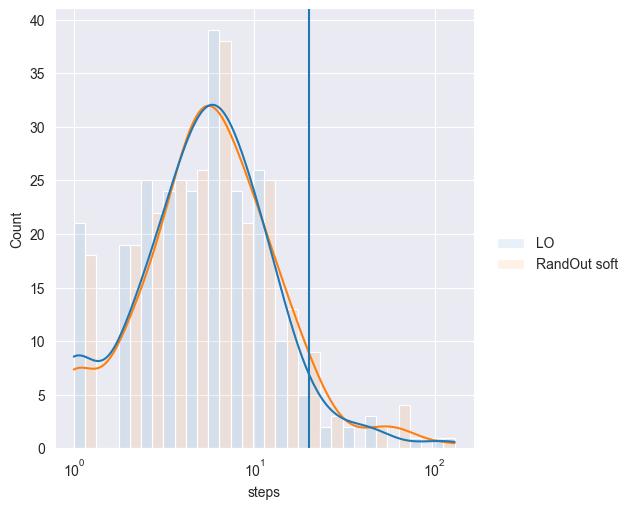

In [19]:
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.1, log_scale=(True, False), multiple="dodge")
# fig.add_legend(title="LO")
plt.axvline(x=20, color=colors_cycle[0])
fig.set_xlabels("steps")
plt.show()

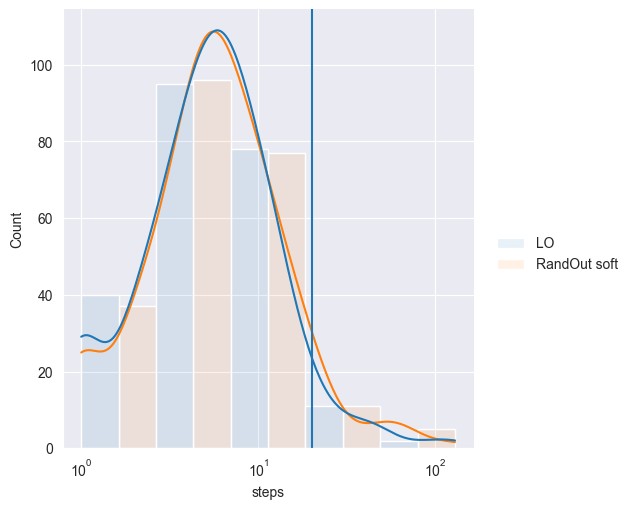

In [26]:
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.show()
# fig = sns.displot(data=steps_LO)
fig = sns.displot(data={"LO": steps_LO,
                        "RandOut soft": steps_RandOut_soft,
                        # "RandOut sum": [step for step in steps_RandOut_sum if step < 20],
                        # "RandOut pow2": [step for step in steps_RandOut_pow_2 if step < 20],
                        }, kde=True, alpha=0.1, log_scale=(True, False), multiple="dodge", bins=5)
# fig.add_legend(title="LO")
plt.axvline(x=20, color=colors_cycle[0])
fig.set_xlabels("steps")
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_3904\837010856.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, ax=ax)
C:\Users\voldo\AppData\Local\Temp\ipykernel_3904\837010856.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, ax=ax2, color='orange')


Text(0, 0.5, 'Density')

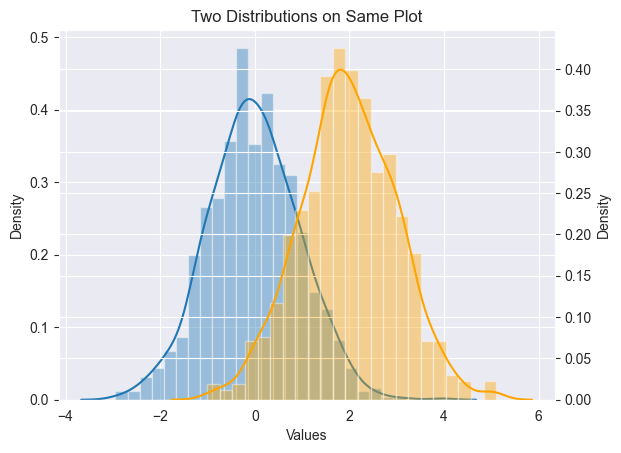

In [20]:
# Generate some random data
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(2, 1, 1000)

# Create subplots
fig, ax = plt.subplots()

# Plot first distribution on first subplot
sns.distplot(x1, ax=ax)

# Create second subplot and plot second distribution
ax2 = ax.twinx()
sns.distplot(x2, ax=ax2, color='orange')

# Set labels for each subplot
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.set_title('Two Distributions on Same Plot')

ax2.set_ylabel('Density')